In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy.ma as ma
import numpy as np
import fuzzymatcher
import statsmodels.formula.api as sm

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

## Cleaning Data

In [2]:
top_colleges_list = pd.read_csv('top_colleges_2022.csv')
barrons = pd.read_csv('Barrons College List.csv')
tuition = pd.read_csv('tuition_cost.csv')

In [3]:
#tuition.columns
tuition = tuition.drop(['state', 'state_code', 'type', 'degree_length',
       'room_and_board', 'in_state_tuition', 'in_state_total',
       'out_of_state_tuition',], axis = 1)
tuition.head()

,name,out_of_state_total
0,Aaniiih Nakoda College,2380
1,Abilene Christian University,45200
2,Abraham Baldwin Agricultural College,21024
3,Academy College,17661
4,Academy of Art University,44458


In [4]:
barrons.columns = barrons.columns.str.rstrip()
barrons['College Name'] = barrons['College Name'].astype(str)
barrons['College Name'] = barrons['College Name'].apply(lambda x: x.strip())
#barrons.head()

In [5]:
data = fuzzymatcher.fuzzy_left_join(top_colleges_list, barrons, ['organizationName'], ['College Name'])

In [6]:
data = data.drop(['best_match_score', '__id_left', '__id_right','description', 'longitude', 'latitude', 'website', 'phoneNumber', 'carnegieClassification', 'studentPopulation', 'College Name', 'City and State'], axis = 1)

In [7]:
data2 = fuzzymatcher.fuzzy_left_join(data, tuition, ['organizationName'], ['name'])

In [8]:
data = data2.drop(['best_match_score', '__id_left', '__id_right','yearFounded', 'stateCode', 'name'], axis = 1)

In [9]:
data.head()

,rank,organizationName,state,campusSetting,medianBaseSalary,city,country,state.1,region,collegeType,studentFacultyRatio,totalStudentPop,undergradPop,totalGrantAid,percentOfStudentsFinAid,percentOfStudentsGrant,Selectivity,out_of_state_total
0,1,Massachusetts Institute of Technology,MA,Urban,173700.0,Cambridge,United States,Massachusetts,Northeast,Private not-for-profit,3,12195,4582,35299332.0,75.0,60.0,1.0,67342
1,2,Stanford University,CA,Suburban,173500.0,Stanford,United States,California,West,Private not-for-profit,4,20961,8464,51328461.0,70.0,55.0,1.0,67117
2,2,"University of California, Berkeley",CA,Urban,154500.0,Berkeley,United States,California,West,Public,19,45878,33208,64495611.0,63.0,53.0,1.0,59336
3,4,Princeton University,NJ,Urban,167600.0,Princeton,United States,New Jersey,Northeast,Private not-for-profit,4,8532,5516,44871096.0,62.0,61.0,1.0,65620
4,5,Columbia University,NY,Urban,148800.0,New York,United States,New York,Northeast,Private not-for-profit,6,33882,8689,44615007.0,58.0,54.0,1.0,74001


In [10]:
#data.isnull().sum(axis=0)

In [11]:
data = data.dropna(axis=0)

# Preparing the Model

In [12]:
# WE ARE DOING LINEAR REGRESSION, medianBaseSalary is continuous variable

# Collinearity & VIF

In [13]:
# our Y variable is medianBaseSalary

In [14]:
data.corr()

,rank,medianBaseSalary,studentFacultyRatio,totalStudentPop,undergradPop,totalGrantAid,percentOfStudentsFinAid,percentOfStudentsGrant,Selectivity,out_of_state_total
rank,1.000000,-0.645332,0.104158,-0.368774,-0.301877,-0.467038,0.651516,0.605133,0.427657,-0.417975
medianBaseSalary,-0.645332,1.000000,-0.443229,-0.074030,-0.156016,0.202065,-0.492029,-0.428602,-0.486363,0.594859
studentFacultyRatio,0.104158,-0.443229,1.000000,0.577120,0.664584,0.147832,0.124652,0.042722,0.339866,-0.660050
totalStudentPop,-0.368774,-0.074030,0.577120,1.000000,0.973690,0.659760,-0.204889,-0.261773,0.078069,-0.297881
undergradPop,-0.301877,-0.156016,0.664584,0.973690,1.000000,0.588302,-0.161342,-0.227700,0.130711,-0.383983
totalGrantAid,-0.467038,0.202065,0.147832,0.659760,0.588302,1.000000,-0.109698,-0.081362,-0.103527,0.216385
percentOfStudentsFinAid,0.651516,-0.492029,0.124652,-0.204889,-0.161342,-0.109698,1.000000,0.958937,0.512090,-0.307817
percentOfStudentsGrant,0.605133,-0.428602,0.042722,-0.261773,-0.227700,-0.081362,0.958937,1.000000,0.444521,-0.178700
Selectivity,0.427657,-0.486363,0.339866,0.078069,0.130711,-0.103527,0.512090,0.444521,1.000000,-0.465824
out_of_state_total,-0.417975,0.594859,-0.660050,-0.297881,-0.383983,0.216385,-0.307817,-0.178700,-0.465824,1.000000


In [15]:
X = data[['Selectivity', 'studentFacultyRatio', 'undergradPop', 'rank', 'out_of_state_total', 'totalGrantAid']]

In [16]:
X.columns[1:]

Index(['studentFacultyRatio', 'undergradPop', 'rank', 'out_of_state_total',
       'totalGrantAid'],
      dtype='object')

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

               feature        VIF
0                const  95.644893
1          Selectivity   1.433446
2  studentFacultyRatio   2.802808
3         undergradPop   4.070057
4                 rank   1.940852
5   out_of_state_total   2.963175
6        totalGrantAid   2.388220


As a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity.

None of our variables have a VIF value above 5 - no indication of collinearity, as of now, keep all predictors.

# Variable Selection

In [18]:
model = smf.ols('medianBaseSalary~Selectivity+studentFacultyRatio+undergradPop+rank+out_of_state_total+totalGrantAid', data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       medianBaseSalary   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     117.4
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           1.98e-90
Time:                        13:25:31   Log-Likelihood:                -5153.5
No. Observations:                 481   AIC:                         1.032e+04
Df Residuals:                     474   BIC:                         1.035e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.397e+05   4889.914     28.565      0.000     1.3e+05    1.49e+05
Selectivity         -2197.7636    749.323     -2.933      0.004   -3670.168    -725.359
studentFacultyRatio  -471.2290    168.889     -2.790      0.005    -803.093    -139.365
undergradPop           -0.2546      0.083     -3.083      0.002      -0.417      -0.092
rank                  -68.4560      4.851    -14.111      0.000     -77.989     -58.923
out_of_state_total      0.1652      0.057      2.875      0.004       0.052       0.278
totalGrantAid        1.741e-05   4.02e-05      0.433      0.665   -6.15e-05    9.64e-05
==============================================================================
Omnibus:                       28.030   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.314
Skew:                           0.523   Prob(JB):                     3.54e-08
Kurtosis:                       3.786   Cond. No.                     3.07e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# without interaction

In [19]:
# Best subset selection

X = data[['Selectivity', 'studentFacultyRatio', 'undergradPop', 'rank', 'out_of_state_total', 'totalGrantAid']]

def processSubset(predictor_subset):
    model = smf.ols('medianBaseSalary~' + '+'.join(predictor_subset),data = data).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

In [20]:
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    models = pd.DataFrame(results)

    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [21]:
import itertools
import time

models_best = pd.DataFrame(columns=["Rsquared", "model"])

tic = time.time()
for i in range(1,1+X.shape[1]):
    models_best.loc[i] = getBest_model(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 6 models on 1 predictors in 0.022249937057495117 seconds.
Processed 15 models on 2 predictors in 0.05031991004943848 seconds.
Processed 20 models on 3 predictors in 0.08056092262268066 seconds.
Processed 15 models on 4 predictors in 0.0707399845123291 seconds.
Processed 6 models on 5 predictors in 0.03647899627685547 seconds.
Processed 1 models on 6 predictors in 0.007969141006469727 seconds.
Total elapsed time: 0.27479100227355957 seconds.


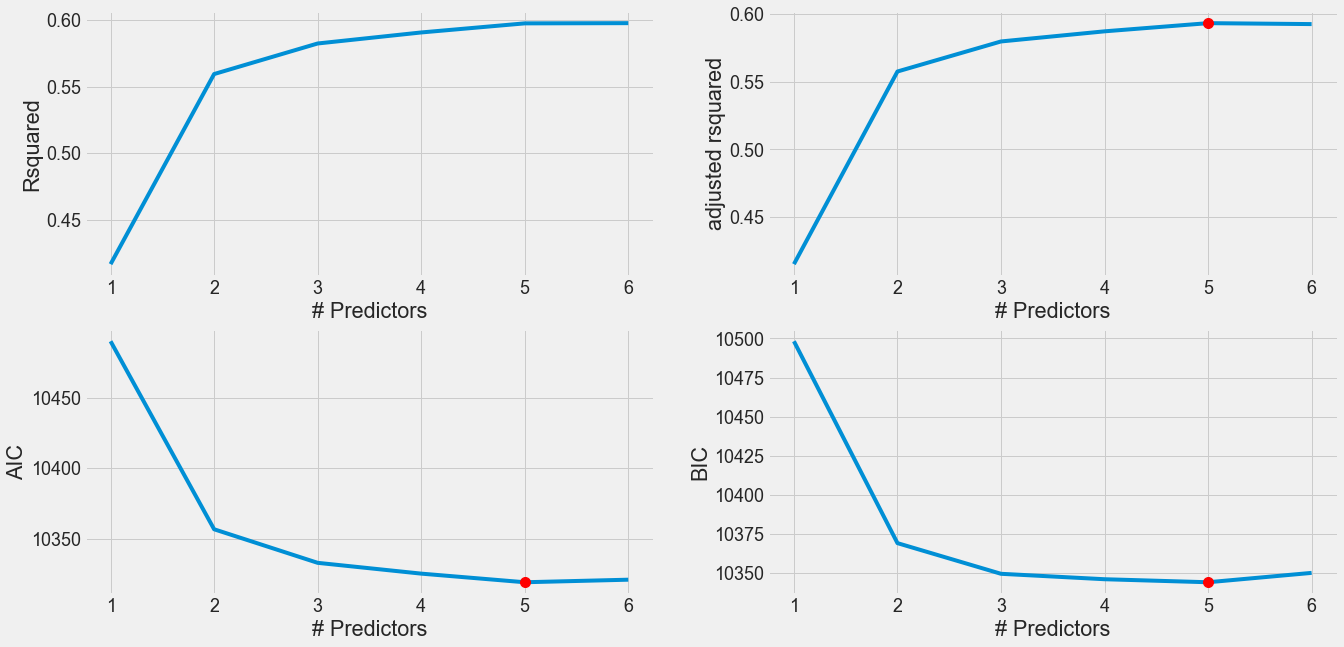

In [22]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

In [23]:
best_subset_model = models_best.loc[5,'model']
best_model = models_best.loc[5,'model']
print(best_model.summary())

                            OLS Regression Results                            
Dep. Variable:       medianBaseSalary   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     141.0
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           1.74e-91
Time:                        13:25:32   Log-Likelihood:                -5153.6
No. Observations:                 481   AIC:                         1.032e+04
Df Residuals:                     475   BIC:                         1.034e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.394e+05   4

In [24]:
# dropping totalGrantAid did not seem to change R^2 at all. Insignificant variable

# with interaction

In [25]:
# wanted to run best subset selection with interactions but it took way too long

In [26]:
data.corr()

,rank,medianBaseSalary,studentFacultyRatio,totalStudentPop,undergradPop,totalGrantAid,percentOfStudentsFinAid,percentOfStudentsGrant,Selectivity,out_of_state_total
rank,1.000000,-0.645332,0.104158,-0.368774,-0.301877,-0.467038,0.651516,0.605133,0.427657,-0.417975
medianBaseSalary,-0.645332,1.000000,-0.443229,-0.074030,-0.156016,0.202065,-0.492029,-0.428602,-0.486363,0.594859
studentFacultyRatio,0.104158,-0.443229,1.000000,0.577120,0.664584,0.147832,0.124652,0.042722,0.339866,-0.660050
totalStudentPop,-0.368774,-0.074030,0.577120,1.000000,0.973690,0.659760,-0.204889,-0.261773,0.078069,-0.297881
undergradPop,-0.301877,-0.156016,0.664584,0.973690,1.000000,0.588302,-0.161342,-0.227700,0.130711,-0.383983
totalGrantAid,-0.467038,0.202065,0.147832,0.659760,0.588302,1.000000,-0.109698,-0.081362,-0.103527,0.216385
percentOfStudentsFinAid,0.651516,-0.492029,0.124652,-0.204889,-0.161342,-0.109698,1.000000,0.958937,0.512090,-0.307817
percentOfStudentsGrant,0.605133,-0.428602,0.042722,-0.261773,-0.227700,-0.081362,0.958937,1.000000,0.444521,-0.178700
Selectivity,0.427657,-0.486363,0.339866,0.078069,0.130711,-0.103527,0.512090,0.444521,1.000000,-0.465824
out_of_state_total,-0.417975,0.594859,-0.660050,-0.297881,-0.383983,0.216385,-0.307817,-0.178700,-0.465824,1.000000


In [27]:
# out_of_state_total & studentFacultyRatio seem to be highly correlated

In [28]:
#model2 = smf.ols('medianBaseSalary~Selectivity+undergradPop+rank+(out_of_state_total*studentFacultyRatio)', data = data).fit()
#model2.summary()

In [29]:
# did not change much

In [30]:
#studentFacultyRatio & undergradPop seem to be highly correlated

In [31]:
#model3 = smf.ols('medianBaseSalary~Selectivity+rank+out_of_state_total+(studentFacultyRatio*undergradPop)+(out_of_state_total*studentFacultyRatio)', data = data).fit()
#model3.summary()

In [32]:
# both variables fairly insignificant

# Variable transformations

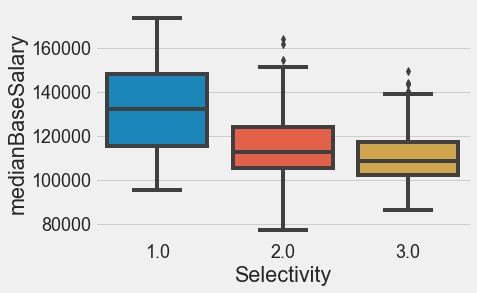

In [33]:
ax = sns.boxplot(x = data.Selectivity, y =data.medianBaseSalary)
#plt.xlabel('Selectivity')
#plt.ylabel('medianBaseSalary')

In [34]:
# 1 = most competitive, 2=highly competitive, 3 = very competitive

Text(0, 0.5, 'Median Base Salary')

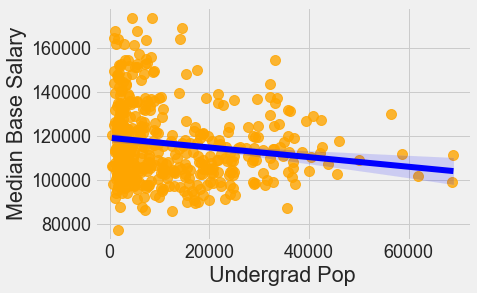

In [35]:
ax = sns.regplot(x = data.undergradPop, y =data.medianBaseSalary,color = 'orange', line_kws = {'color':'blue'})
plt.xlabel('Undergrad Pop')
plt.ylabel('Median Base Salary')

In [36]:
#ax = sns.regplot(x = data.out_of_state_total, y =data.medianBaseSalary,color = 'orange', line_kws = {'color':'blue'})
#plt.xlabel('Tuition')
#plt.ylabel('Median Base Salary')

In [37]:
#ax = sns.regplot(x = data.studentFacultyRatio, y =data.medianBaseSalary,color = 'orange', line_kws = {'color':'blue'})
#plt.xlabel('Student Faculty Ratio')
#plt.ylabel('Median Base Salary')

In [38]:
# seems that undergrad Pop is the variable with least linearity of the variables

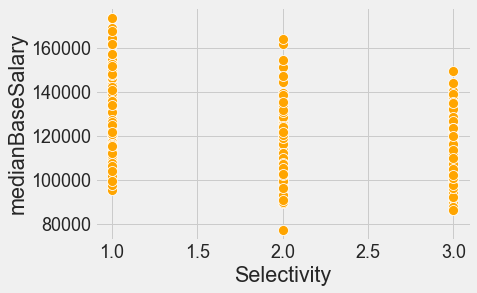

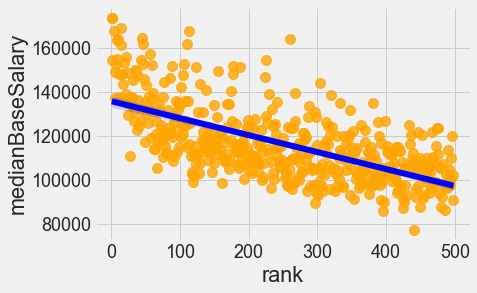

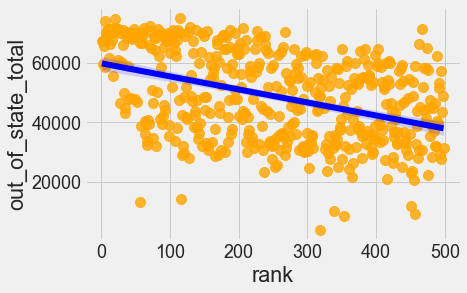

In [39]:
sns.scatterplot(x = 'Selectivity', y = 'medianBaseSalary', data = data, color = 'orange')
plt.show()
sns.regplot(x = 'rank', y = 'medianBaseSalary', data = data, color = 'orange', line_kws = {'color':'blue'})
plt.show()
sns.regplot(x = 'rank', y = 'out_of_state_total', data = data, color = 'orange', line_kws = {'color':'blue'})
plt.show()

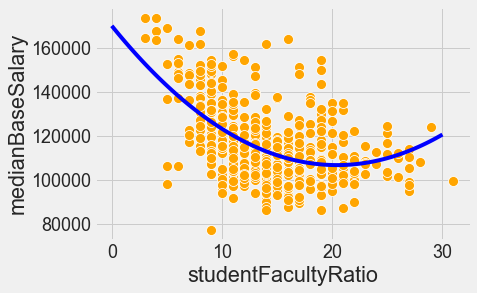

In [40]:
sns.scatterplot(x = 'studentFacultyRatio', y = 'medianBaseSalary', data = data, color = 'orange')
fit = np.polyfit(data.studentFacultyRatio, data.medianBaseSalary, 2)

quad_func = np.poly1d(fit)
x_fit = np.linspace(0, 30, 100)
y_fit = quad_func(x_fit)
plt.plot(x_fit, y_fit, 'b')
plt.show()

In [41]:
# seems like the relationship between studentFacultyRatio and medianBaseSalary is quadratic

In [42]:
model2 = smf.ols('medianBaseSalary~Selectivity+studentFacultyRatio+I(studentFacultyRatio**2)+np.log(undergradPop)+rank+out_of_state_total', data = data).fit()
model2.summary()
# log transformation - increased R-squared most

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       medianBaseSalary   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     121.8
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           9.87e-93
Time:                        13:25:34   Log-Likelihood:                -5148.1
No. Observations:                 481   AIC:                         1.031e+04
Df Residuals:                     474   BIC:                         1.034e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    1.689e+05   7935.523     21.290      0.000    1.53e+05    1.85e+05
Selectivity                 -1703.0334    763.598     -2.230      0.026   -3203.489    -202.578
studentFacultyRatio         -1453.2087    577.130     -2.518      0.012   -2587.259    -319.159
I(studentFacultyRatio ** 2)    33.6545     16.637      2.023      0.044       0.962      66.347
np.log(undergradPop)        -3044.6356    772.830     -3.940      0.000   -4563.232   -1526.039
rank                          -68.8255      5.058    -13.608      0.000     -78.764     -58.887
out_of_state_total              0.1718      0.051      3.356      0.001       0.071       0.272
==============================================================================
Omnibus:                       22.001   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.751
Skew:                           0.423   Prob(JB):                     9.42e-07
Kurtosis:                       3.819   Cond. No.                     8.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# checking model assumptions

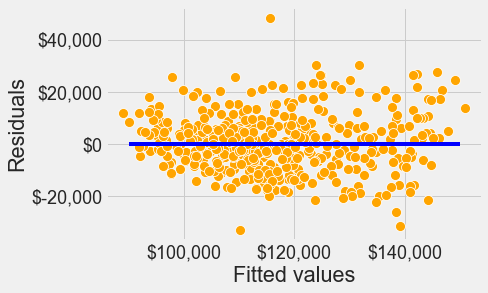

In [43]:
ax = sns.scatterplot(x = model2.fittedvalues, y=model2.resid,color = 'orange')
sns.lineplot(x = [90000, 150000],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.xaxis.set_major_formatter('${x:,.0f}')

In [44]:
# assumption of linearity seems to be satisfied - no transformations needed

In [45]:
# seems to be constant variance of terms - no transformations needed

In [46]:
print(data.Selectivity.head())

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Selectivity, dtype: float64


# Creating Random Test Dataset

In [47]:
numbers = list(range(1, 501))

# Create a pandas dataframe with a single column named 'Subject' and assign the list of numbers as the values(these will be their names)
test = pd.DataFrame({'Subject': numbers})

# Sample 500 random college names from the 'College names' column
random_college_names = data['organizationName'].sample(n=500, replace=True).reset_index(drop=True)

# Add the 'College names' column to the df dataframe
test['organizationName'] = random_college_names

## Create a new column in old_df that adds some noise to the medianBaseSalary column
data['Salary'] = data['medianBaseSalary'] + np.random.randint(-30000, 30001, size=len(data))

# Merge the attributes from old_df to df based on the 'College names' column
test = pd.merge(test, data[['organizationName', 'Selectivity', 'studentFacultyRatio', 'undergradPop', 'rank', 'out_of_state_total', 'totalGrantAid', 'medianBaseSalary', 'Salary']], on='organizationName', how='left')

print(test.head())

   Subject                           organizationName  Selectivity  \
0        1  Montana Tech of the University of Montana          3.0   
1        2                          Kalamazoo College          2.0   
2        3                       CUNY, Lehman College          2.0   
3        4                               Reed College          1.0   
4        5    University of New Hampshire, Manchester          3.0   

   studentFacultyRatio  undergradPop  rank  out_of_state_total  totalGrantAid  \
0                   13          1645   355               32230      1522295.0   
1                   13          1510   183               58272     14195248.0   
2                   17         17112   297               30299      9013756.0   
3                    9          1537   227               70550      9154498.0   
4                   10          1206   462               30635       728000.0   

   medianBaseSalary    Salary  
0          113700.0  125203.0  
1          112800.0   99845.

In [49]:
# checking rmse of model with all predictors

pred_salary = model.predict(test)
print(np.sqrt(((test.Salary - pred_salary)**2).mean()))

19823.342932171738


In [50]:
# checking rmse of finished model with subset predictors and transformations

pred_salary2 = model2.predict(test)
print(np.sqrt(((test.Salary - pred_salary2)**2).mean()))

19821.79305017046


In [51]:
# it decreased but by like 2

# this in terms of salary --> $19,000 error in salary ISN'T terrible